# HulC, adaptive HulC, unimodal HulC, and adaptive unimodal HulC

## Introduction
For a univariate parameter, HulC and adaptive HulC return the minimum and maximum of B estimators computed on subsets of data. The quantity B depends on the median bias. HulC uses a known (asymptotic) median bias value and adaptive HulC estimates the unknown median bias based on subsampling. HulC and adaptive HulC have (asymptotically) valid coverage if the true median bias of the estimators is bounded away from $1/2$. If the median bias is $1/2$, then the estimator is pathologically asymmetric lying always on one side of the true parameter. 

For a univariate parameter, unimodal HulC returns an inflated convex hull. If $\theta_{\min}$ and $\theta_{\max}$ represent the minimum and maximum of $B$ estimators, then the unimodal HulC confidence interval is
\begin{equation*}
\left[\theta_{\min} - t(\theta_{\max} - \theta_{\min}),\,\theta_{\max} + t(\theta_{\max} - \theta_{\min})\right],
\end{equation*}
for a tuning parameter $t > 0$. If the estimator is asymptotically unimodal and $t > 0$, then with any median bias value there exists a $B < \infty$ such that the inflated convex hull has valid coverage asymptotically. Unimodal HulC can also account for the median bias. If the median bias is zero, then for $t > 0$ unimodal HulC can potentially uses less number of splits. But the inflation can result in larger width. Similar to adaptive HulC, one can estimate the median bias using subsampling and use this value in unimodal HulC. We call this method adaptive unimodal HulC. 

For most of the traditional estimators that are asymptotically Gaussian with mean zero, all the four methods apply and have valid coverage asymptotically. In the following, we compare the number of splits required, coverage, and width in different examples. 

In [5]:
### HulC.R contains all the functions related to the HulC procedure.
source("HulC.R")

### loading necessary packages for computation and plotting.
library("sandwich")
library(ggplot2)
library("cowplot")
library("gridExtra")
library("repr")
args(HulC)
args(adaptive_HulC)
args(unimodal_HulC)
args(adaptive_unimodal_HulC)

function (data, estimate, alpha = 0.05, Delta = 0, dim = 1, randomize = TRUE) 
NULL

function (data, estimate, alpha = 0.05, dim = 1, subsamp_exp = 2/3, 
    nsub = 1000, randomize = TRUE) 
NULL

function (data, estimate, alpha = 0.05, Delta = 1/2, t = 0.1, 
    dim = 1, randomize = TRUE) 
NULL

function (data, estimate, alpha = 0.05, t = 0.1, dim = 1, subsamp_exp = 2/3, 
    nsub = 1000, randomize = TRUE) 
NULL

## Normal Mean Problem
In the following, we consider the problem of confidence interval for the mean of a normal random variable. In this case, the sample mean estimator is symmetric around the true mean and hence $\Delta = 0$. 

In [32]:
## Unimodal HulC with Delta = 0, t = 0 is same as HulC with Delta = 0
set.seed(100)
x <- rnorm(100)
HulC(x, mean)
set.seed(100)
x <- rnorm(100)
unimodal_HulC(x, mean, Delta = 0, t = 0.0)

lwr,upr
-0.3442454,0.4508495


lwr,upr
-0.3442454,0.4508495


In [35]:
## one replication
set.seed(100)
x <- rnorm(100)
print("HulC")
HulC(x, mean)
print("Adaptive HulC")
adaptive_HulC(x, mean)
print("Unimodal HulC")
unimodal_HulC(x, mean, Delta = 0, t = 0.1)
print("Adaptive Unimodal HulC")
adaptive_unimodal_HulC(x, mean, t = 0.1)

[1] "HulC"


lwr,upr
-0.3442454,0.4508495


[1] "Adaptive HulC"


lwr,upr
-0.3417399,0.2134533


[1] "Unimodal HulC"


lwr,upr
-0.4513943,0.8455475


[1] "Adaptive Unimodal HulC"


lwr,upr
-0.4732013,0.5115113


In [49]:
alpha <- 0.05
foo <- function(x, method){
    if(method == "HulC"){
        return(HulC(x, mean, alpha = alpha))
    }
    if(method == "aHulC"){
        return(adaptive_HulC(x, mean, alpha = alpha))
    }
    if(method == "uHulC"){
        return(unimodal_HulC(x, mean, Delta = 0, t = 0.1, alpha = alpha))
    }
    if(method == "auHulC"){
        return(adaptive_unimodal_HulC(x, mean, t = 0.1, alpha = alpha))
    }
}

set.seed(2021)
nrep <- 1000
nsamp_seq <- c(100, 250, 500)
method_seq <- c("HulC", "aHulC", "uHulC", "auHulC")
grid <- expand.grid(1:nrep, method_seq, nsamp_seq)
### width_ratio stores the ratio of width of the method to the
### Wald interval.
mat <- data.frame(ci_lwr = rep(0, nrow(grid)), ci_upr = rep(0, nrow(grid)),
                  width_ratio = rep(0, nrow(grid)), coverage = rep(0, nrow(grid)),
                 B = rep(1, nrow(grid)), method = grid[,2], nsamp = grid[,3])

for(idx in 1:nrow(grid)){
    x <- rnorm(mat$nsamp[idx])
    tmp <- foo(x, mat$method[idx])
    mat$ci_lwr[idx] <- tmp$CI[,"lwr"]
    mat$ci_upr[idx] <- tmp$CI[,"upr"]
    mat$width_ratio[idx] <- (mat$ci_upr[idx] - mat$ci_lwr[idx])*sqrt(mat$nsamp[idx])/(qnorm(1 - alpha/2)*sd(x))
    mat$coverage[idx] <- (mat$ci_upr[idx]*mat$ci_lwr[idx] <= 0)
    mat$B[idx] <- tmp$B
}
head(mat)
table(mat$nsamp)
table(mat$method)

ci_lwr,ci_upr,width_ratio,coverage,B,method,nsamp
-0.5541668,0.1316315,3.401660,1,5,HulC,100
-0.3160997,0.3377094,3.202530,1,6,HulC,100
-0.1510335,0.3692332,2.575008,1,5,HulC,100
-0.3915441,0.3202445,3.621438,1,5,HulC,100
-0.2555961,0.3369879,3.012874,1,6,HulC,100
-0.1972266,0.1923163,2.136466,1,5,HulC,100



 100  250  500 
4000 4000 4000 


  HulC  aHulC  uHulC auHulC 
  3000   3000   3000   3000 

### Comparison in terms of the number of Splits

In [50]:
cat("Proportion of times the number of splits for HulC is 5 or 6:\n")
table(mat[mat$method == "HulC", "B"])/length(mat[mat$method == "HulC", "B"])
cat("Proportion of times the number of splits for adaptive HulC is 5 or 6:\n")
table(mat[mat$method == "aHulC", "B"])/length(mat[mat$method == "aHulC", "B"])
cat("Proportion of times the number of splits for unimodal HulC is 4 or 5:\n")
table(mat[mat$method == "uHulC", "B"])/length(mat[mat$method == "uHulC", "B"])
cat("Proportion of times the number of splits for adpative unimodal HulC is 4 or 5:\n")
table(mat[mat$method == "auHulC", "B"])/length(mat[mat$method == "auHulC", "B"])

Proportion of times the number of splits for HulC is 5 or 6:



        5         6 
0.6046667 0.3953333 

Proportion of times the number of splits for adaptive HulC is 5 or 6:



        5         6 
0.5813333 0.4186667 

Proportion of times the number of splits for unimodal HulC is 4 or 5:



        4         5 
0.1443333 0.8556667 

Proportion of times the number of splits for adpative unimodal HulC is 4 or 5:



    4     5 
0.133 0.867 

We notice the number of splits is about 5 for all methods. HulC and adaptive HulC require 6 splits larger proportion of times. Unimodal and adaptive unimodal HulC methods tend to require smaller number of splits (5). 

### Comparison in terms of coverage

In [70]:
options(repr.plot.width=14, repr.plot.height=8)
# par(mfrow = c(1, 3), cex.lab=1.5, cex.axis = 1.5)
for(nsamp in nsamp_seq){
    nsamp_mat <- c(mean(mat[mat$nsamp == nsamp & mat$method == "HulC", "coverage"]),
                  mean(mat[mat$nsamp == nsamp & mat$method == "aHulC", "coverage"]),
                  mean(mat[mat$nsamp == nsamp & mat$method == "uHulC", "coverage"]),
                  mean(mat[mat$nsamp == nsamp & mat$method == "auHulC", "coverage"]))
    names(nsamp_mat) <- c("HulC", "aHulC", "uHulC", "auHulC")
    cat(paste("Coverage for sample size:", nsamp), "\n")
    print(nsamp_mat)
}

Coverage for sample size: 100 
  HulC  aHulC  uHulC auHulC 
 0.954  0.943  0.953  0.959 
Coverage for sample size: 250 
  HulC  aHulC  uHulC auHulC 
 0.959  0.937  0.956  0.956 
Coverage for sample size: 500 
  HulC  aHulC  uHulC auHulC 
 0.957  0.957  0.941  0.948 


The coverage for all the methods at all sample sizes is very close to 0.95. 

### Comparison in terms of width

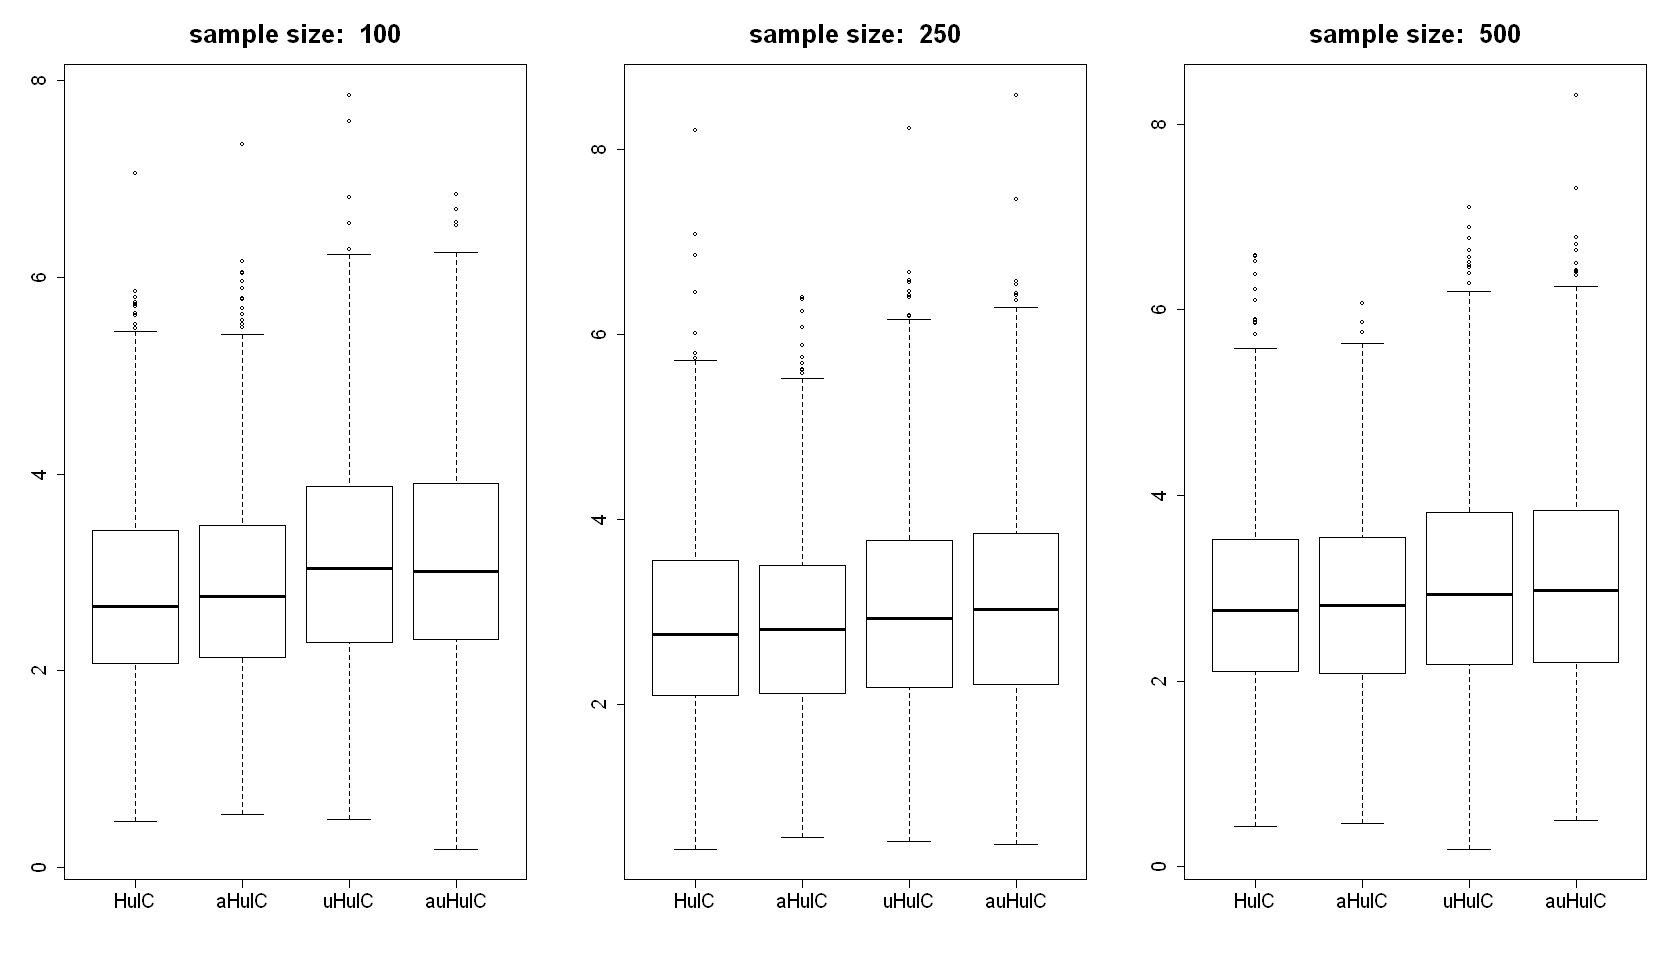

In [67]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(1, 3), cex.lab=1.5, cex.axis = 1.5)
for(nsamp in nsamp_seq){
    nsamp_mat <- cbind(mat[mat$nsamp == nsamp & mat$method == "HulC", "width_ratio"],
                      mat[mat$nsamp == nsamp & mat$method == "aHulC", "width_ratio"],
                      mat[mat$nsamp == nsamp & mat$method == "uHulC", "width_ratio"],
                      mat[mat$nsamp == nsamp & mat$method == "auHulC", "width_ratio"])
    colnames(nsamp_mat) <- c("HulC", "aHulC", "uHulC", "auHulC")
    boxplot(nsamp_mat, cex.lab = 1.5)
    title(paste("sample size: ", nsamp), cex.main = 2)
}
# nsamp_seq
# table(mat$nsamp)
# table(mat$method)

The plot above shows the ratio of width of the HulC procedures to the Wald confidence interval. We note that the width is on average larger for unimodal and adaptive unimodal HulC procedures. The width is similar between the HulC and adaptive HulC procedures (with and without unimodality). The width ratio is similar across sample sizes (between 100 and 500).

## Behavior of unimodal HulC as t changes
In the following, we compare the performance of unimodal HulC and adaptive unimodal HulC as t changes from $0$ to $2$.

In [ ]:
alpha <- 0.05
foo <- function(x, method, t){
    if(method == "HulC"){
        return(HulC(x, mean, alpha = alpha))
    }
    if(method == "aHulC"){
        return(adaptive_HulC(x, mean, alpha = alpha))
    }
    if(method == "uHulC"){
        return(unimodal_HulC(x, mean, Delta = 0, t = t, alpha = alpha))
    }
    if(method == "auHulC"){
        return(adaptive_unimodal_HulC(x, mean, t = t, alpha = alpha))
    }
}

set.seed(2021)
nrep <- 1000
nsamp_seq <- c(100, 250, 500)
t_seq <- seq(0, 2, length = 100)
method_seq <- c("uHulC")
grid <- expand.grid(1:nrep, method_seq, nsamp_seq, t_seq)
### width_ratio stores the ratio of width of the method to the
### Wald interval.
mat <- data.frame(width_ratio = rep(0, nrow(grid)), coverage = rep(0, nrow(grid)),
                 B = rep(1, nrow(grid)), method = grid[,2], nsamp = grid[,3], t = grid[,4])

for(idx in 1:nrow(grid)){
    x <- rnorm(mat$nsamp[idx])
    tmp <- foo(x, mat$method[idx])
    tmp_HulC <- foo(x, "HulC")
    mat$width_ratio[idx] <- diff(tmp$CI)/diff(tmp_HulC$CI)
    mat$coverage[idx] <- (prod(tmp$CI) <= 0)
    mat$B[idx] <- tmp$B
}
head(mat)

### Comparison in terms of coverage
We now compute the coverage of unimodal HulC as $t$ changes.